In [3]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

file = "GamingStudy_data.csv"

dataset = pd.read_csv(file, encoding="ISO-8859-1")

In [5]:
gender_df = dataset[["S. No.", "Game", "Platform", "Hours", "earnings", "whyplay", "streams", "Gender", "Age", "Work",
"Degree", "Birthplace", "Residence", "Playstyle","Narcissism", "GAD_T", "SWL_T", "SPIN_T"]]
gender_df.head()

,S. No.,Game,Platform,Hours,earnings,whyplay,streams,Gender,Age,Work,Degree,Birthplace,Residence,Playstyle,Narcissism,GAD_T,SWL_T,SPIN_T
0,8766,League of Legends,PC,20.0,I play for fun,All of the Above,12.0,Male,18,Student at school,High school diploma (or equivalent),Netherlands,Netherlands,Multiplayer - online - with online acquaintanc...,2.0,11,11,25.0
1,3519,League of Legends,PC,30.0,I play mostly for fun but earn a little on the...,All of the Above,15.0,Male,20,Student at college / university,Bachelor (or equivalent),USA,USA,Multiplayer - online - with online acquaintanc...,4.0,4,26,5.0
2,6263,League of Legends,PC,15.0,I play for fun,All of the Above,3.0,Male,26,Employed,Bachelor (or equivalent),USA,USA,Multiplayer - online - with real life friends,1.0,4,16,18.0
3,1915,League of Legends,PC,10.0,I play for fun,All of the Above,0.0,Male,24,Student at college / university,High school diploma (or equivalent),UK,UK,Multiplayer - online - with real life friends,1.0,2,16,6.0
4,10157,Other,PC,35.0,I play for fun,All of the Above,0.0,Male,25,Student at college / university,Bachelor (or equivalent),Germany,Germany,Multiplayer - online - with real life friends,1.0,2,18,33.0


In [6]:
totalCount = len(gender_df['Gender'])
totalGenderCount = gender_df['Gender'].value_counts()
totalMaleCount = len(gender_df.loc[gender_df['Gender'] == "Male"])
totalFemaleCount = len(gender_df.loc[gender_df['Gender'] == "Female"])
totalOtherCount = len(gender_df.loc[gender_df['Gender'] == "Other"])

In [7]:
male_df = gender_df.loc[gender_df['Gender'] == "Male"]
female_df = gender_df.loc[gender_df['Gender'] == "Female"]
other_df = gender_df.loc[gender_df['Gender'] == "Other"]

In [8]:
GAD_df = gender_df.loc[gender_df['GAD_T'] > 9]
SWL_df = gender_df.loc[gender_df['SWL_T'] < 20]
SPIN_df = gender_df.loc[gender_df['SPIN_T'] > 19]

GAD_Count = len(GAD_df['S. No.'])
G_Percent = round(GAD_Count / totalCount * 100,2)
SWL_Count = len(SWL_df['S. No.'])
SW_Percent = round(SWL_Count / totalCount * 100,2)
SPIN_Count = len(SPIN_df['S. No.'])
SP_Percent = round(SPIN_Count / totalCount * 100,2)

print(f"Total GAD Count: {GAD_Count} ({G_Percent}%)")
print(f"Total SWL Count: {SWL_Count} ({SW_Percent}%)")
print(f"Total SPIN Count: {SPIN_Count} ({SP_Percent}%)")

Total GAD Count: 1562 (17.54%)
Total SWL Count: 4150 (46.6%)
Total SPIN Count: 3661 (41.11%)


In [9]:
mGAD_df = male_df.loc[male_df['GAD_T'] > 9]
mSWL_df = male_df.loc[male_df['SWL_T'] < 20]
mSPIN_df = male_df.loc[male_df['SPIN_T'] > 19]

mGAD_Count = len(mGAD_df['S. No.'])
mG_Percent = round(mGAD_Count / totalMaleCount * 100,2)
mSWL_Count = len(mSWL_df['S. No.'])
mSW_Percent = round(mSWL_Count / totalMaleCount * 100,2)
mSPIN_Count = len(mSPIN_df['S. No.'])
mSP_Percent = round(mSPIN_Count / totalMaleCount * 100,2)

print(f"Male GAD Count: {mGAD_Count} ({mG_Percent}%)")
print(f"Male SWL Count: {mSWL_Count} ({mSW_Percent}%)")
print(f"Male SPIN Count: {mSPIN_Count} ({mSP_Percent}%)")

Male GAD Count: 1365 (16.34%)
Male SWL Count: 3863 (46.24%)
Male SPIN Count: 3301 (39.51%)


In [10]:
fGAD_df = female_df.loc[female_df['GAD_T'] > 9]
fSWL_df = female_df.loc[female_df['SWL_T'] < 20]
fSPIN_df = female_df.loc[female_df['SPIN_T'] > 19]

fGAD_Count = len(fGAD_df['S. No.'])
fG_Percent = round(fGAD_Count / totalFemaleCount * 100,2)
fSWL_Count = len(fSWL_df['S. No.'])
fSW_Percent = round(fSWL_Count / totalFemaleCount * 100,2)
fSPIN_Count = len(fSPIN_df['S. No.'])
fSP_Percent = round(fSPIN_Count / totalFemaleCount * 100,2)

print(f"Female GAD Count: {fGAD_Count} ({fG_Percent}%)")
print(f"Female SWL Count: {fSWL_Count} ({fSW_Percent}%)")
print(f"Female SPIN Count: {fSPIN_Count} ({fSP_Percent}%)")

Female GAD Count: 178 (34.63%)
Female SWL Count: 261 (50.78%)
Female SPIN Count: 336 (65.37%)


In [11]:
oGAD_df = other_df.loc[other_df['GAD_T'] > 9]
oSWL_df = other_df.loc[other_df['SWL_T'] < 20]
oSPIN_df = other_df.loc[other_df['SPIN_T'] > 19]

oGAD_Count = len(oGAD_df['S. No.'])
oG_Percent = round(oGAD_Count / totalOtherCount * 100,2)
oSWL_Count = len(oSWL_df['S. No.'])
oSW_Percent = round(oSWL_Count / totalOtherCount * 100,2)
oSPIN_Count = len(oSPIN_df['S. No.'])
oSP_Percent = round(oSPIN_Count / totalOtherCount * 100,2)

print(f"Other GAD Count: {oGAD_Count} ({oG_Percent}%)")
print(f"Other SWL Count: {oSWL_Count} ({oSW_Percent}%)")
print(f"Other SPIN Count: {oSPIN_Count} ({oSP_Percent}%)")

Other GAD Count: 19 (51.35%)
Other SWL Count: 26 (70.27%)
Other SPIN Count: 24 (64.86%)


In [12]:
breakdown = [["Male", totalMaleCount, mG_Percent, mSW_Percent, mSP_Percent], ["Female", totalFemaleCount, fG_Percent, fSW_Percent, fSP_Percent], ["Other", totalOtherCount, oG_Percent, oSW_Percent, oSP_Percent]]
columns = ['Gender', 'Count', 'GAD %', 'SWL %', 'SPIN %']
display_df = pd.DataFrame(breakdown, columns = columns)
display_df

,Gender,Count,GAD %,SWL %,SPIN %
0,Male,8354,16.34,46.24,39.51
1,Female,514,34.63,50.78,65.37
2,Other,37,51.35,70.27,64.86


In [13]:
gender_df['whyplay'].value_counts()

Having Fun          3571
Improving           3254
Winning             1453
Relaxing             428
Other                124
All of the Above      74
Sexual Thrill          1
Name: whyplay, dtype: int64

In [19]:
rel_df = gender_df.loc[gender_df['whyplay'] == "Relaxing"]
imp_df = gender_df.loc[gender_df['whyplay'] == "Improving"]
win_df = gender_df.loc[gender_df['whyplay'] == "Winning"]
fun_df = gender_df.loc[gender_df['whyplay'] == "Having Fun"]
all_df = gender_df.loc[gender_df['whyplay'] == "All of the Above"]
oth_df = gender_df.loc[gender_df['whyplay'] == "Other"]

In [28]:
totalCount = len(gender_df['whyplay'])
totalwhyCount = gender_df['whyplay'].value_counts()
rel_count = len(gender_df.loc[gender_df['whyplay'] == "Relaxing"])
imp_count = len(gender_df.loc[gender_df['whyplay'] == "Improving"])
win_count = len(gender_df.loc[gender_df['whyplay'] == "Winning"])
fun_count = len(gender_df.loc[gender_df['whyplay'] == "Having Fun"])
all_count = len(gender_df.loc[gender_df['whyplay'] == "All of the Above"])
other_count = len(gender_df.loc[gender_df['whyplay'] == "Other"])

In [29]:
#Relaxing dataframes
relmale_df = rel_df.loc[rel_df['Gender'] == "Male"]
relMaleCount = len(relmale_df['S. No.'])
relfemale_df = rel_df.loc[rel_df['Gender'] == "Female"]
relFemaleCount = len(relfemale_df['S. No.'])
relother_df = rel_df.loc[rel_df['Gender'] == "Other"]
reltotalOtherCount = len(relother_df['S. No.'])

In [30]:
impmale_df = imp_df.loc[imp_df['Gender'] == "Male"]
impMaleCount = len(impmale_df['S. No.'])
impfemale_df = imp_df.loc[imp_df['Gender'] == "Female"]
impFemaleCount = len(impfemale_df['S. No.'])
impother_df = imp_df.loc[imp_df['Gender'] == "Other"]
imptotalOtherCount = len(impother_df['S. No.'])

In [31]:
winmale_df = win_df.loc[win_df['Gender'] == "Male"]
winMaleCount = len(winmale_df['S. No.'])
winfemale_df = win_df.loc[win_df['Gender'] == "Female"]
winFemaleCount = len(winfemale_df['S. No.'])
winother_df = win_df.loc[win_df['Gender'] == "Other"]
wintotalOtherCount = len(winother_df['S. No.'])

In [32]:
funmale_df = fun_df.loc[fun_df['Gender'] == "Male"]
funMaleCount = len(funmale_df['S. No.'])
funfemale_df = fun_df.loc[fun_df['Gender'] == "Female"]
funFemaleCount = len(funfemale_df['S. No.'])
funother_df = fun_df.loc[fun_df['Gender'] == "Other"]
funtotalOtherCount = len(funother_df['S. No.'])

In [33]:
allmale_df = all_df.loc[all_df['Gender'] == "Male"]
allMaleCount = len(allmale_df['S. No.'])
allfemale_df = all_df.loc[all_df['Gender'] == "Female"]
allFemaleCount = len(allfemale_df['S. No.'])
allother_df = all_df.loc[all_df['Gender'] == "Other"]
alltotalOtherCount = len(allother_df['S. No.'])

In [34]:
othmale_df = oth_df.loc[oth_df['Gender'] == "Male"]
othMaleCount = len(othmale_df['S. No.'])
othfemale_df = oth_df.loc[oth_df['Gender'] == "Female"]
othFemaleCount = len(othfemale_df['S. No.'])
othother_df = oth_df.loc[oth_df['Gender'] == "Other"]
othtotalOtherCount = len(othother_df['S. No.'])

In [36]:
relGAD_df = rel_df.loc[rel_df['GAD_T'] > 9]
relSWL_df = rel_df.loc[rel_df['SWL_T'] < 20]
relSPIN_df = rel_df.loc[rel_df['SPIN_T'] > 19]

relGAD_Count = len(relGAD_df['S. No.'])
relG_Percent = round(relGAD_Count / rel_count * 100,2)
relSWL_Count = len(relSWL_df['S. No.'])
relSW_Percent = round(relSWL_Count / rel_count * 100,2)
relSPIN_Count = len(relSPIN_df['S. No.'])
relSP_Percent = round(relSPIN_Count / rel_count * 100,2)

relmGAD_df = relmale_df.loc[relmale_df['GAD_T'] > 9]
relmSWL_df = relmale_df.loc[relmale_df['SWL_T'] < 20]
relmSPIN_df = relmale_df.loc[relmale_df['SPIN_T'] > 19]

relmGAD_Count = len(relmGAD_df['S. No.'])
relmG_Percent = round(relmGAD_Count / relMaleCount * 100,2)
relmSWL_Count = len(relmSWL_df['S. No.'])
relmSW_Percent = round(relmSWL_Count / relMaleCount * 100,2)
relmSPIN_Count = len(relmSPIN_df['S. No.'])
relmSP_Percent = round(relmSPIN_Count / relMaleCount * 100,2)

relfGAD_df = relfemale_df.loc[relfemale_df['GAD_T'] > 9]
relfSWL_df = relfemale_df.loc[relfemale_df['SWL_T'] < 20]
relfSPIN_df = relfemale_df.loc[relfemale_df['SPIN_T'] > 19]

relfGAD_Count = len(relfGAD_df['S. No.'])
relfG_Percent = round(relfGAD_Count / relFemaleCount * 100,2)
relfSWL_Count = len(relfSWL_df['S. No.'])
relfSW_Percent = round(relfSWL_Count / relFemaleCount * 100,2)
relfSPIN_Count = len(relfSPIN_df['S. No.'])
relfSP_Percent = round(relfSPIN_Count / relFemaleCount * 100,2)

reloGAD_df = relother_df.loc[relother_df['GAD_T'] > 9]
reloSWL_df = relother_df.loc[relother_df['SWL_T'] < 20]
reloSPIN_df = relother_df.loc[relother_df['SPIN_T'] > 19]

reloGAD_Count = len(reloGAD_df['S. No.'])
reloG_Percent = round(reloGAD_Count / reltotalOtherCount * 100,2)
reloSWL_Count = len(reloSWL_df['S. No.'])
reloSW_Percent = round(reloSWL_Count / reltotalOtherCount * 100,2)
reloSPIN_Count = len(reloSPIN_df['S. No.'])
reloSP_Percent = round(reloSPIN_Count / reltotalOtherCount * 100,2)

print("----------")
print(f"Total GAD Count: {relGAD_Count} ({relG_Percent}%)")
print(f"Total SWL Count: {relSWL_Count} ({relSW_Percent}%)")
print(f"Total SPIN Count: {relSPIN_Count} ({relSP_Percent}%)")
print("----------")
print(f"Male Total GAD Count: {relmGAD_Count} ({relmG_Percent}%)")
print(f"Male Total SWL Count: {relmSWL_Count} ({relmSW_Percent}%)")
print(f"Male Total SPIN Count: {relmSPIN_Count} ({relmSP_Percent}%)")
print("----------")
print(f"Female Total GAD Count: {relfGAD_Count} ({relfG_Percent}%)")
print(f"Female Total SWL Count: {relfSWL_Count} ({relfSW_Percent}%)")
print(f"Female Total SPIN Count: {relfSPIN_Count} ({relfSP_Percent}%)")
print("----------")
print(f"Total GAD Count: {reloGAD_Count} ({reloG_Percent}%)")
print(f"Total SWL Count: {reloSWL_Count} ({reloSW_Percent}%)")
print(f"Total SPIN Count: {reloSPIN_Count} ({reloSP_Percent}%)")

----------
Total GAD Count: 104 (24.3%)
Total SWL Count: 233 (54.44%)
Total SPIN Count: 188 (43.93%)
----------
Male Total GAD Count: 88 (22.51%)
Male Total SWL Count: 206 (52.69%)
Male Total SPIN Count: 165 (42.2%)
----------
Female Total GAD Count: 14 (41.18%)
Female Total SWL Count: 25 (73.53%)
Female Total SPIN Count: 21 (61.76%)
----------
Total GAD Count: 2 (66.67%)
Total SWL Count: 2 (66.67%)
Total SPIN Count: 2 (66.67%)


In [37]:
impGAD_df = imp_df.loc[imp_df['GAD_T'] > 9]
impSWL_df = imp_df.loc[imp_df['SWL_T'] < 20]
impSPIN_df = imp_df.loc[imp_df['SPIN_T'] > 19]

impGAD_Count = len(impGAD_df['S. No.'])
impG_Percent = round(impGAD_Count / imp_count * 100,2)
impSWL_Count = len(impSWL_df['S. No.'])
impSW_Percent = round(impSWL_Count / imp_count * 100,2)
impSPIN_Count = len(impSPIN_df['S. No.'])
impSP_Percent = round(impSPIN_Count / imp_count * 100,2)

impmGAD_df = impmale_df.loc[impmale_df['GAD_T'] > 9]
impmSWL_df = impmale_df.loc[impmale_df['SWL_T'] < 20]
impmSPIN_df = impmale_df.loc[impmale_df['SPIN_T'] > 19]

impmGAD_Count = len(impmGAD_df['S. No.'])
impmG_Percent = round(impmGAD_Count / impMaleCount * 100,2)
impmSWL_Count = len(impmSWL_df['S. No.'])
impmSW_Percent = round(impmSWL_Count / impMaleCount * 100,2)
impmSPIN_Count = len(impmSPIN_df['S. No.'])
impmSP_Percent = round(impmSPIN_Count / impMaleCount * 100,2)

impfGAD_df = impfemale_df.loc[impfemale_df['GAD_T'] > 9]
impfSWL_df = impfemale_df.loc[impfemale_df['SWL_T'] < 20]
impfSPIN_df = impfemale_df.loc[impfemale_df['SPIN_T'] > 19]

impfGAD_Count = len(impfGAD_df['S. No.'])
impfG_Percent = round(impfGAD_Count / impFemaleCount * 100,2)
impfSWL_Count = len(impfSWL_df['S. No.'])
impfSW_Percent = round(impfSWL_Count / impFemaleCount * 100,2)
impfSPIN_Count = len(impfSPIN_df['S. No.'])
impfSP_Percent = round(impfSPIN_Count / impFemaleCount * 100,2)

impoGAD_df = impother_df.loc[impother_df['GAD_T'] > 9]
impoSWL_df = impother_df.loc[impother_df['SWL_T'] < 20]
impoSPIN_df = impother_df.loc[impother_df['SPIN_T'] > 19]

impoGAD_Count = len(impoGAD_df['S. No.'])
impoG_Percent = round(impoGAD_Count / imptotalOtherCount * 100,2)
impoSWL_Count = len(impoSWL_df['S. No.'])
impoSW_Percent = round(impoSWL_Count / imptotalOtherCount * 100,2)
impoSPIN_Count = len(impoSPIN_df['S. No.'])
impoSP_Percent = round(impoSPIN_Count / imptotalOtherCount * 100,2)

print("----------")
print(f"Total GAD Count: {impGAD_Count} ({impG_Percent}%)")
print(f"Total SWL Count: {impSWL_Count} ({impSW_Percent}%)")
print(f"Total SPIN Count: {impSPIN_Count} ({impSP_Percent}%)")
print("----------")
print(f"Male Total GAD Count: {impmGAD_Count} ({impmG_Percent}%)")
print(f"Male Total SWL Count: {impmSWL_Count} ({impmSW_Percent}%)")
print(f"Male Total SPIN Count: {impmSPIN_Count} ({impmSP_Percent}%)")
print("----------")
print(f"Female Total GAD Count: {impfGAD_Count} ({impfG_Percent}%)")
print(f"Female Total SWL Count: {impfSWL_Count} ({impfSW_Percent}%)")
print(f"Female Total SPIN Count: {impfSPIN_Count} ({impfSP_Percent}%)")
print("----------")
print(f"Total GAD Count: {impoGAD_Count} ({impoG_Percent}%)")
print(f"Total SWL Count: {impoSWL_Count} ({impoSW_Percent}%)")
print(f"Total SPIN Count: {impoSPIN_Count} ({impoSP_Percent}%)")

----------
Total GAD Count: 568 (17.46%)
Total SWL Count: 1542 (47.39%)
Total SPIN Count: 1324 (40.69%)
----------
Male Total GAD Count: 509 (16.54%)
Male Total SWL Count: 1444 (46.93%)
Male Total SPIN Count: 1213 (39.42%)
----------
Female Total GAD Count: 52 (32.7%)
Female Total SWL Count: 85 (53.46%)
Female Total SPIN Count: 100 (62.89%)
----------
Total GAD Count: 7 (38.89%)
Total SWL Count: 13 (72.22%)
Total SPIN Count: 11 (61.11%)


In [38]:
funGAD_df = fun_df.loc[fun_df['GAD_T'] > 9]
funSWL_df = fun_df.loc[fun_df['SWL_T'] < 20]
funSPIN_df = fun_df.loc[fun_df['SPIN_T'] > 19]

funGAD_Count = len(funGAD_df['S. No.'])
funG_Percent = round(funGAD_Count / fun_count * 100,2)
funSWL_Count = len(funSWL_df['S. No.'])
funSW_Percent = round(funSWL_Count / fun_count * 100,2)
funSPIN_Count = len(funSPIN_df['S. No.'])
funSP_Percent = round(funSPIN_Count / fun_count * 100,2)

funmGAD_df = funmale_df.loc[funmale_df['GAD_T'] > 9]
funmSWL_df = funmale_df.loc[funmale_df['SWL_T'] < 20]
funmSPIN_df = funmale_df.loc[funmale_df['SPIN_T'] > 19]

funmGAD_Count = len(funmGAD_df['S. No.'])
funmG_Percent = round(funmGAD_Count / funMaleCount * 100,2)
funmSWL_Count = len(funmSWL_df['S. No.'])
funmSW_Percent = round(funmSWL_Count / funMaleCount * 100,2)
funmSPIN_Count = len(funmSPIN_df['S. No.'])
funmSP_Percent = round(funmSPIN_Count / funMaleCount * 100,2)

funfGAD_df = funfemale_df.loc[funfemale_df['GAD_T'] > 9]
funfSWL_df = funfemale_df.loc[funfemale_df['SWL_T'] < 20]
funfSPIN_df = funfemale_df.loc[funfemale_df['SPIN_T'] > 19]

funfGAD_Count = len(funfGAD_df['S. No.'])
funfG_Percent = round(funfGAD_Count / funFemaleCount * 100,2)
funfSWL_Count = len(funfSWL_df['S. No.'])
funfSW_Percent = round(funfSWL_Count / funFemaleCount * 100,2)
funfSPIN_Count = len(funfSPIN_df['S. No.'])
funfSP_Percent = round(funfSPIN_Count / funFemaleCount * 100,2)

funoGAD_df = funother_df.loc[funother_df['GAD_T'] > 9]
funoSWL_df = funother_df.loc[funother_df['SWL_T'] < 20]
funoSPIN_df = funother_df.loc[funother_df['SPIN_T'] > 19]

funoGAD_Count = len(funoGAD_df['S. No.'])
funoG_Percent = round(funoGAD_Count / funtotalOtherCount * 100,2)
funoSWL_Count = len(funoSWL_df['S. No.'])
funoSW_Percent = round(funoSWL_Count / funtotalOtherCount * 100,2)
funoSPIN_Count = len(funoSPIN_df['S. No.'])
funoSP_Percent = round(funoSPIN_Count / funtotalOtherCount * 100,2)

print("----------")
print(f"Total GAD Count: {funGAD_Count} ({funG_Percent}%)")
print(f"Total SWL Count: {funSWL_Count} ({funSW_Percent}%)")
print(f"Total SPIN Count: {funSPIN_Count} ({funSP_Percent}%)")
print("----------")
print(f"Male Total GAD Count: {funmGAD_Count} ({funmG_Percent}%)")
print(f"Male Total SWL Count: {funmSWL_Count} ({funmSW_Percent}%)")
print(f"Male Total SPIN Count: {funmSPIN_Count} ({funmSP_Percent}%)")
print("----------")
print(f"Female Total GAD Count: {funfGAD_Count} ({funfG_Percent}%)")
print(f"Female Total SWL Count: {funfSWL_Count} ({funfSW_Percent}%)")
print(f"Female Total SPIN Count: {funfSPIN_Count} ({funfSP_Percent}%)")
print("----------")
print(f"Total GAD Count: {funoGAD_Count} ({funoG_Percent}%)")
print(f"Total SWL Count: {funoSWL_Count} ({funoSW_Percent}%)")
print(f"Total SPIN Count: {funoSPIN_Count} ({funoSP_Percent}%)")

----------
Total GAD Count: 497 (13.92%)
Total SWL Count: 1468 (41.11%)
Total SPIN Count: 1397 (39.12%)
----------
Male Total GAD Count: 408 (12.37%)
Male Total SWL Count: 1345 (40.79%)
Male Total SPIN Count: 1217 (36.91%)
----------
Female Total GAD Count: 81 (31.03%)
Female Total SWL Count: 114 (43.68%)
Female Total SPIN Count: 169 (64.75%)
----------
Total GAD Count: 8 (61.54%)
Total SWL Count: 9 (69.23%)
Total SPIN Count: 11 (84.62%)


In [39]:
winGAD_df = win_df.loc[win_df['GAD_T'] > 9]
winSWL_df = win_df.loc[win_df['SWL_T'] < 20]
winSPIN_df = win_df.loc[win_df['SPIN_T'] > 19]

winGAD_Count = len(winGAD_df['S. No.'])
winG_Percent = round(winGAD_Count / win_count * 100,2)
winSWL_Count = len(winSWL_df['S. No.'])
winSW_Percent = round(winSWL_Count / win_count * 100,2)
winSPIN_Count = len(winSPIN_df['S. No.'])
winSP_Percent = round(winSPIN_Count / win_count * 100,2)

winmGAD_df = winmale_df.loc[winmale_df['GAD_T'] > 9]
winmSWL_df = winmale_df.loc[winmale_df['SWL_T'] < 20]
winmSPIN_df = winmale_df.loc[winmale_df['SPIN_T'] > 19]

winmGAD_Count = len(winmGAD_df['S. No.'])
winmG_Percent = round(winmGAD_Count / winMaleCount * 100,2)
winmSWL_Count = len(winmSWL_df['S. No.'])
winmSW_Percent = round(winmSWL_Count / winMaleCount * 100,2)
winmSPIN_Count = len(winmSPIN_df['S. No.'])
winmSP_Percent = round(winmSPIN_Count / winMaleCount * 100,2)

winfGAD_df = winfemale_df.loc[winfemale_df['GAD_T'] > 9]
winfSWL_df = winfemale_df.loc[winfemale_df['SWL_T'] < 20]
winfSPIN_df = winfemale_df.loc[winfemale_df['SPIN_T'] > 19]

winfGAD_Count = len(winfGAD_df['S. No.'])
winfG_Percent = round(winfGAD_Count / winFemaleCount * 100,2)
winfSWL_Count = len(winfSWL_df['S. No.'])
winfSW_Percent = round(winfSWL_Count / winFemaleCount * 100,2)
winfSPIN_Count = len(winfSPIN_df['S. No.'])
winfSP_Percent = round(winfSPIN_Count / winFemaleCount * 100,2)

winoGAD_df = winother_df.loc[winother_df['GAD_T'] > 9]
winoSWL_df = winother_df.loc[winother_df['SWL_T'] < 20]
winoSPIN_df = winother_df.loc[winother_df['SPIN_T'] > 19]

winoGAD_Count = len(winoGAD_df['S. No.'])
winoG_Percent = round(winoGAD_Count / wintotalOtherCount * 100,2)
winoSWL_Count = len(winoSWL_df['S. No.'])
winoSW_Percent = round(winoSWL_Count / wintotalOtherCount * 100,2)
winoSPIN_Count = len(winoSPIN_df['S. No.'])
winoSP_Percent = round(winoSPIN_Count / wintotalOtherCount * 100,2)

print("----------")
print(f"Total GAD Count: {winGAD_Count} ({winG_Percent}%)")
print(f"Total SWL Count: {winSWL_Count} ({winSW_Percent}%)")
print(f"Total SPIN Count: {winSPIN_Count} ({winSP_Percent}%)")
print("----------")
print(f"Male Total GAD Count: {winmGAD_Count} ({winmG_Percent}%)")
print(f"Male Total SWL Count: {winmSWL_Count} ({winmSW_Percent}%)")
print(f"Male Total SPIN Count: {winmSPIN_Count} ({winmSP_Percent}%)")
print("----------")
print(f"Female Total GAD Count: {winfGAD_Count} ({winfG_Percent}%)")
print(f"Female Total SWL Count: {winfSWL_Count} ({winfSW_Percent}%)")
print(f"Female Total SPIN Count: {winfSPIN_Count} ({winfSP_Percent}%)")
print("----------")
print(f"Total GAD Count: {winoGAD_Count} ({winoG_Percent}%)")
print(f"Total SWL Count: {winoSWL_Count} ({winoSW_Percent}%)")
print(f"Total SPIN Count: {winoSPIN_Count} ({winoSP_Percent}%)")

----------
Total GAD Count: 337 (23.19%)
Total SWL Count: 800 (55.06%)
Total SPIN Count: 665 (45.77%)
----------
Male Total GAD Count: 310 (22.08%)
Male Total SWL Count: 771 (54.91%)
Male Total SPIN Count: 630 (44.87%)
----------
Female Total GAD Count: 26 (55.32%)
Female Total SWL Count: 28 (59.57%)
Female Total SPIN Count: 35 (74.47%)
----------
Total GAD Count: 1 (50.0%)
Total SWL Count: 1 (50.0%)
Total SPIN Count: 0 (0.0%)


In [42]:
allGAD_df = all_df.loc[all_df['GAD_T'] > 9]
allSWL_df = all_df.loc[all_df['SWL_T'] < 20]
allSPIN_df = all_df.loc[all_df['SPIN_T'] > 19]

allGAD_Count = len(allGAD_df['S. No.'])
allG_Percent = round(allGAD_Count / all_count * 100,2)
allSWL_Count = len(allSWL_df['S. No.'])
allSW_Percent = round(allSWL_Count / all_count * 100,2)
allSPIN_Count = len(allSPIN_df['S. No.'])
allSP_Percent = round(allSPIN_Count / all_count * 100,2)

allmGAD_df = allmale_df.loc[allmale_df['GAD_T'] > 9]
allmSWL_df = allmale_df.loc[allmale_df['SWL_T'] < 20]
allmSPIN_df = allmale_df.loc[allmale_df['SPIN_T'] > 19]

allmGAD_Count = len(allmGAD_df['S. No.'])
allmG_Percent = round(allmGAD_Count / allMaleCount * 100,2)
allmSWL_Count = len(allmSWL_df['S. No.'])
allmSW_Percent = round(allmSWL_Count / allMaleCount * 100,2)
allmSPIN_Count = len(allmSPIN_df['S. No.'])
allmSP_Percent = round(allmSPIN_Count / allMaleCount * 100,2)

allfGAD_df = allfemale_df.loc[allfemale_df['GAD_T'] > 9]
allfSWL_df = allfemale_df.loc[allfemale_df['SWL_T'] < 20]
allfSPIN_df = allfemale_df.loc[allfemale_df['SPIN_T'] > 19]

allfGAD_Count = len(allfGAD_df['S. No.'])
allfG_Percent = round(allfGAD_Count / allFemaleCount * 100,2)
allfSWL_Count = len(allfSWL_df['S. No.'])
allfSW_Percent = round(allfSWL_Count / allFemaleCount * 100,2)
allfSPIN_Count = len(allfSPIN_df['S. No.'])
allfSP_Percent = round(allfSPIN_Count / allFemaleCount * 100,2)

alloGAD_df = allother_df.loc[allother_df['GAD_T'] > 9]
alloSWL_df = allother_df.loc[allother_df['SWL_T'] < 20]
alloSPIN_df = allother_df.loc[allother_df['SPIN_T'] > 19]

alloGAD_Count = len(alloGAD_df['S. No.'])
alloSWL_Count = len(alloSWL_df['S. No.'])
alloSPIN_Count = len(alloSPIN_df['S. No.'])

print("----------")
print(f"Total GAD Count: {allGAD_Count} ({allG_Percent}%)")
print(f"Total SWL Count: {allSWL_Count} ({allSW_Percent}%)")
print(f"Total SPIN Count: {allSPIN_Count} ({allSP_Percent}%)")
print("----------")
print(f"Male Total GAD Count: {allmGAD_Count} ({allmG_Percent}%)")
print(f"Male Total SWL Count: {allmSWL_Count} ({allmSW_Percent}%)")
print(f"Male Total SPIN Count: {allmSPIN_Count} ({allmSP_Percent}%)")
print("----------")
print(f"Female Total GAD Count: {allfGAD_Count} ({allfG_Percent}%)")
print(f"Female Total SWL Count: {allfSWL_Count} ({allfSW_Percent}%)")
print(f"Female Total SPIN Count: {allfSPIN_Count} ({allfSP_Percent}%)")
print("----------")
print(f"Total GAD Count: {alloGAD_Count} (0%)")
print(f"Total SWL Count: {alloSWL_Count} (0%)")
print(f"Total SPIN Count: {alloSPIN_Count} (0%)")

----------
Total GAD Count: 12 (16.22%)
Total SWL Count: 29 (39.19%)
Total SPIN Count: 25 (33.78%)
----------
Male Total GAD Count: 10 (14.49%)
Male Total SWL Count: 26 (37.68%)
Male Total SPIN Count: 21 (30.43%)
----------
Female Total GAD Count: 2 (40.0%)
Female Total SWL Count: 3 (60.0%)
Female Total SPIN Count: 4 (80.0%)
----------
Total GAD Count: 0 (0%)
Total SWL Count: 0 (0%)
Total SPIN Count: 0 (0%)


In [44]:
othGAD_df = oth_df.loc[oth_df['GAD_T'] > 9]
othSWL_df = oth_df.loc[oth_df['SWL_T'] < 20]
othSPIN_df = oth_df.loc[oth_df['SPIN_T'] > 19]

othGAD_Count = len(othGAD_df['S. No.'])
othG_Percent = round(othGAD_Count / other_count * 100,2)
othSWL_Count = len(othSWL_df['S. No.'])
othSW_Percent = round(othSWL_Count / other_count * 100,2)
othSPIN_Count = len(othSPIN_df['S. No.'])
othSP_Percent = round(othSPIN_Count / other_count * 100,2)

othmGAD_df = othmale_df.loc[othmale_df['GAD_T'] > 9]
othmSWL_df = othmale_df.loc[othmale_df['SWL_T'] < 20]
othmSPIN_df = othmale_df.loc[othmale_df['SPIN_T'] > 19]

othmGAD_Count = len(othmGAD_df['S. No.'])
othmG_Percent = round(othmGAD_Count / othMaleCount * 100,2)
othmSWL_Count = len(othmSWL_df['S. No.'])
othmSW_Percent = round(othmSWL_Count / othMaleCount * 100,2)
othmSPIN_Count = len(othmSPIN_df['S. No.'])
othmSP_Percent = round(othmSPIN_Count / othMaleCount * 100,2)

othfGAD_df = othfemale_df.loc[othfemale_df['GAD_T'] > 9]
othfSWL_df = othfemale_df.loc[othfemale_df['SWL_T'] < 20]
othfSPIN_df = othfemale_df.loc[othfemale_df['SPIN_T'] > 19]

othfGAD_Count = len(othfGAD_df['S. No.'])
othfG_Percent = round(othfGAD_Count / othFemaleCount * 100,2)
othfSWL_Count = len(othfSWL_df['S. No.'])
othfSW_Percent = round(othfSWL_Count / othFemaleCount * 100,2)
othfSPIN_Count = len(othfSPIN_df['S. No.'])
othfSP_Percent = round(othfSPIN_Count / othFemaleCount * 100,2)

othoGAD_df = othother_df.loc[othother_df['GAD_T'] > 9]
othoSWL_df = othother_df.loc[othother_df['SWL_T'] < 20]
othoSPIN_df = othother_df.loc[othother_df['SPIN_T'] > 19]

othoGAD_Count = len(othoGAD_df['S. No.'])
othoG_Percent = round(othoGAD_Count / othtotalOtherCount * 100,2)
othoSWL_Count = len(othoSWL_df['S. No.'])
othoSW_Percent = round(othoSWL_Count / othtotalOtherCount * 100,2)
othoSPIN_Count = len(othoSPIN_df['S. No.'])
othoSP_Percent = round(othoSPIN_Count / othtotalOtherCount * 100,2)

print("----------")
print(f"Total GAD Count: {othGAD_Count} ({othG_Percent}%)")
print(f"Total SWL Count: {othSWL_Count} ({othSW_Percent}%)")
print(f"Total SPIN Count: {othSPIN_Count} ({othSP_Percent}%)")
print("----------")
print(f"Male Total GAD Count: {othmGAD_Count} ({othmG_Percent}%)")
print(f"Male Total SWL Count: {othmSWL_Count} ({othmSW_Percent}%)")
print(f"Male Total SPIN Count: {othmSPIN_Count} ({othmSP_Percent}%)")
print("----------")
print(f"Female Total GAD Count: {othfGAD_Count} ({othfG_Percent}%)")
print(f"Female Total SWL Count: {othfSWL_Count} ({othfSW_Percent}%)")
print(f"Female Total SPIN Count: {othfSPIN_Count} ({othfSP_Percent}%)")
print("----------")
print(f"Total GAD Count: {othoGAD_Count} ({othoG_Percent}%)")
print(f"Total SWL Count: {othoSWL_Count} ({othoSW_Percent}%)")
print(f"Total SPIN Count: {othoSPIN_Count} ({othoSP_Percent}%)")

----------
Total GAD Count: 44 (35.48%)
Total SWL Count: 78 (62.9%)
Total SPIN Count: 62 (50.0%)
----------
Male Total GAD Count: 40 (34.78%)
Male Total SWL Count: 71 (61.74%)
Male Total SPIN Count: 55 (47.83%)
----------
Female Total GAD Count: 3 (37.5%)
Female Total SWL Count: 6 (75.0%)
Female Total SPIN Count: 7 (87.5%)
----------
Total GAD Count: 1 (100.0%)
Total SWL Count: 1 (100.0%)
Total SPIN Count: 0 (0.0%)


In [46]:
relbreak = [["Male", relMaleCount, relmG_Percent, relmSW_Percent, relmSP_Percent], ["Female", relFemaleCount, relfG_Percent, relfSW_Percent, relfSP_Percent], ["Other", reltotalOtherCount, reloG_Percent, reloSW_Percent, reloSP_Percent]]
relcol = ["Gender", "Count", "GAD %", "SWL %", "SPIN %"]
reldis_df = pd.DataFrame(relbreak, columns = relcol)
print("----------------------")
print("Relaxation DataFrame")
reldis_df

----------------------
Relaxation DataFrame


,Gender,Count,GAD %,SWL %,SPIN %
0,Male,391,22.51,52.69,42.20
1,Female,34,41.18,73.53,61.76
2,Other,3,66.67,66.67,66.67


In [47]:
impbreak = [["Male", impMaleCount, impmG_Percent, impmSW_Percent, impmSP_Percent], ["Female", impFemaleCount, impfG_Percent, impfSW_Percent, impfSP_Percent], ["Other", imptotalOtherCount, impoG_Percent, impoSW_Percent, impoSP_Percent]]
impcol = ["Gender", "Count", "GAD %", "SWL %", "SPIN %"]
impdis_df = pd.DataFrame(impbreak, columns = impcol)
print("----------------------")
print("Improvement DataFrame")
impdis_df

----------------------
Improvement DataFrame


,Gender,Count,GAD %,SWL %,SPIN %
0,Male,3077,16.54,46.93,39.42
1,Female,159,32.70,53.46,62.89
2,Other,18,38.89,72.22,61.11


In [51]:
winbreak = [["Male", winMaleCount, winmG_Percent, winmSW_Percent, winmSP_Percent], ["Female", winFemaleCount, winfG_Percent, winfSW_Percent, winfSP_Percent], ["Other", wintotalOtherCount, winoG_Percent, winoSW_Percent, winoSP_Percent]]
wincol = ["Gender", "Count", "GAD %", "SWL %", "SPIN %"]
windis_df = pd.DataFrame(winbreak, columns = wincol)
print("----------------------")
print("winaxation DataFrame")
windis_df

----------------------
winaxation DataFrame


,Gender,Count,GAD %,SWL %,SPIN %
0,Male,1404,22.08,54.91,44.87
1,Female,47,55.32,59.57,74.47
2,Other,2,50.00,50.00,0.00


In [52]:
funbreak = [["Male", funMaleCount, funmG_Percent, funmSW_Percent, funmSP_Percent], ["Female", funFemaleCount, funfG_Percent, funfSW_Percent, funfSP_Percent], ["Other", funtotalOtherCount, funoG_Percent, funoSW_Percent, funoSP_Percent]]
funcol = ["Gender", "Count", "GAD %", "SWL %", "SPIN %"]
fundis_df = pd.DataFrame(funbreak, columns = funcol)
print("----------------------")
print("funaxation DataFrame")
fundis_df

----------------------
funaxation DataFrame


,Gender,Count,GAD %,SWL %,SPIN %
0,Male,3297,12.37,40.79,36.91
1,Female,261,31.03,43.68,64.75
2,Other,13,61.54,69.23,84.62


In [57]:
allbreak = [["Male", allMaleCount, allmG_Percent, allmSW_Percent, allmSP_Percent], ["Female", allFemaleCount, allfG_Percent, allfSW_Percent, allfSP_Percent]]
allcol = ["Gender", "Count", "GAD %", "SWL %", "SPIN %"]
alldis_df = pd.DataFrame(allbreak, columns = allcol)
print("----------------------")
print("allaxation DataFrame")
alldis_df

----------------------
allaxation DataFrame


,Gender,Count,GAD %,SWL %,SPIN %
0,Male,69,14.49,37.68,30.43
1,Female,5,40.00,60.00,80.00


In [58]:
othbreak = [["Male", othMaleCount, othmG_Percent, othmSW_Percent, othmSP_Percent], ["Female", othFemaleCount, othfG_Percent, othfSW_Percent, othfSP_Percent]]
othcol = ["Gender", "Count", "GAD %", "SWL %", "SPIN %"]
othdis_df = pd.DataFrame(othbreak, columns = othcol)
print("----------------------")
print("othaxation DataFrame")
othdis_df

----------------------
othaxation DataFrame


,Gender,Count,GAD %,SWL %,SPIN %
0,Male,115,34.78,61.74,47.83
1,Female,8,37.50,75.00,87.50


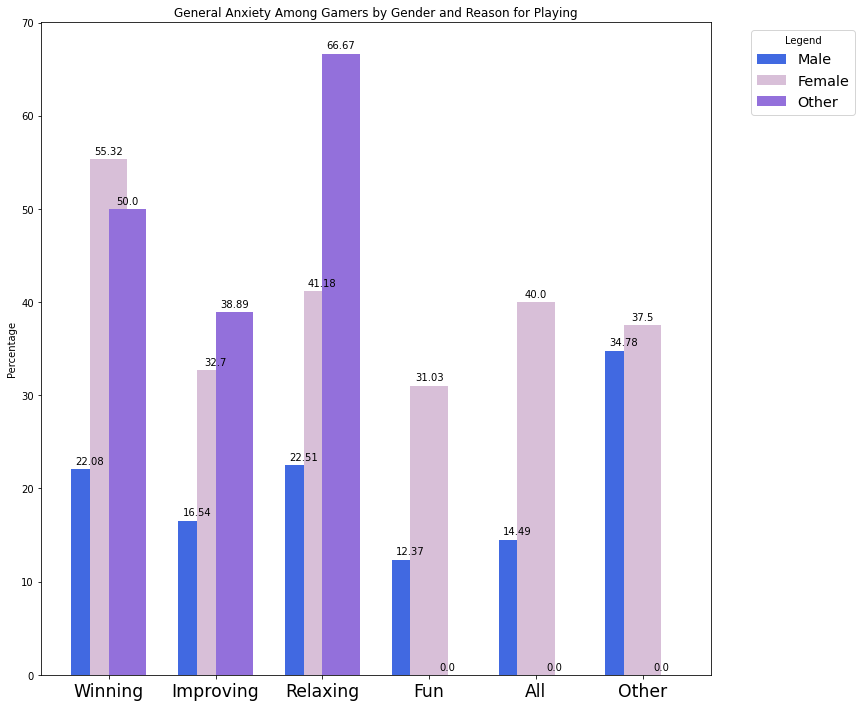

In [122]:
labels = ['Winning', 'Improving', 'Relaxing', 'Fun', 'All', 'Other']
malanx = [winmG_Percent, impmG_Percent, relmG_Percent, funmG_Percent, allmG_Percent, othmG_Percent]
femanx = [winfG_Percent, impfG_Percent, relfG_Percent, funfG_Percent, allfG_Percent, othfG_Percent]
othanx = [winoG_Percent, impoG_Percent, reloG_Percent, 0, 0, 0]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, malanx, width, label='Male', color='royalblue')
rects2 = ax.bar(x, femanx, width, label='Female',color='thistle')
rects3 = ax.bar(x + width/2, othanx, width, label='Other', color='mediumpurple')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('General Anxiety Among Gamers by Gender and Reason for Playing')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize='xx-large')
ax.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left',  fontsize='x-large')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.set_size_inches(12, 12)

plt.show()

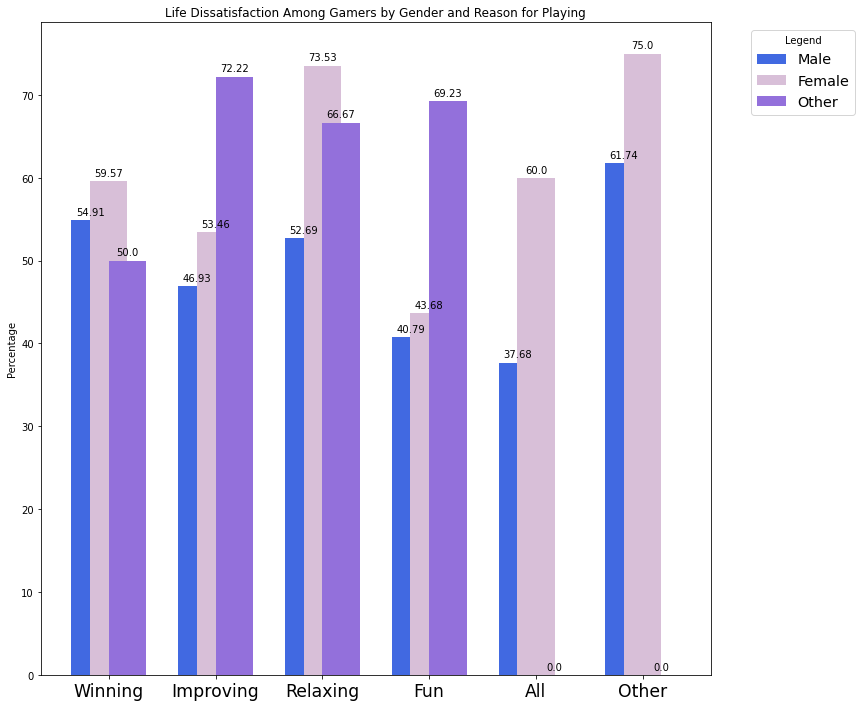

In [123]:
labels = ['Winning', 'Improving', 'Relaxing', 'Fun', 'All', 'Other']
malsat = [winmSW_Percent, impmSW_Percent, relmSW_Percent, funmSW_Percent, allmSW_Percent, othmSW_Percent]
femsat = [winfSW_Percent, impfSW_Percent, relfSW_Percent, funfSW_Percent, allfSW_Percent, othfSW_Percent]
othsat = [winoSW_Percent, impoSW_Percent, reloSW_Percent, funoSW_Percent, 0, 0]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, malsat, width, label='Male', color='royalblue')
rects2 = ax.bar(x, femsat, width, label='Female',color='thistle')
rects3 = ax.bar(x + width/2, othsat, width, label='Other', color='mediumpurple')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('Life Dissatisfaction Among Gamers by Gender and Reason for Playing')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize='xx-large')
ax.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left',  fontsize='x-large')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.set_size_inches(12, 12)

plt.show()

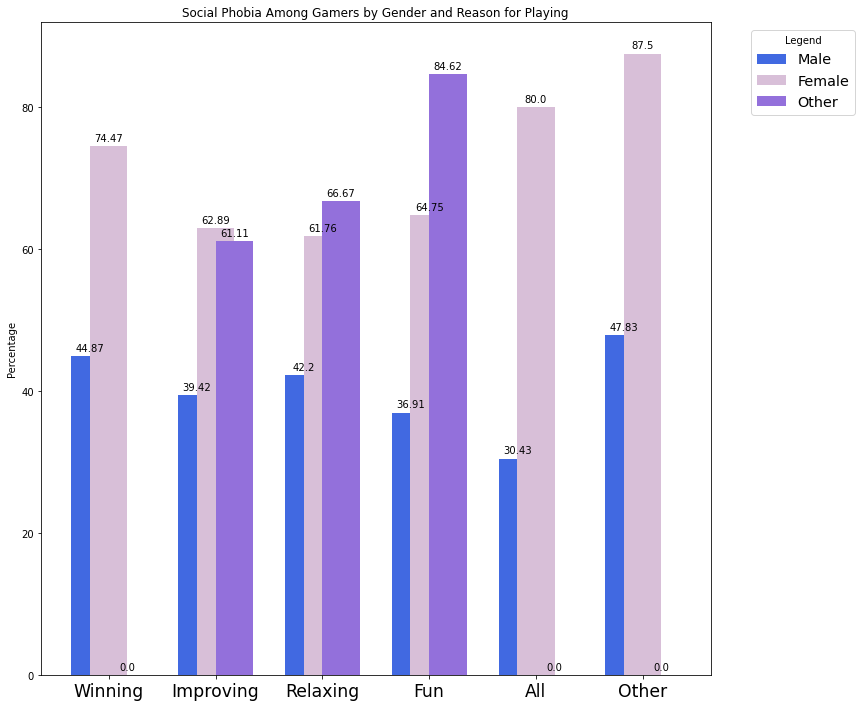

In [124]:
labels = ['Winning', 'Improving', 'Relaxing', 'Fun', 'All', 'Other']
malpho = [winmSP_Percent, impmSP_Percent, relmSP_Percent, funmSP_Percent, allmSP_Percent, othmSP_Percent]
fempho = [winfSP_Percent, impfSP_Percent, relfSP_Percent, funfSP_Percent, allfSP_Percent, othfSP_Percent]
othpho = [winoSP_Percent, impoSP_Percent, reloSP_Percent, funoSP_Percent, 0, 0]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, malpho, width, label='Male', color='royalblue')
rects2 = ax.bar(x, fempho, width, label='Female',color='thistle')
rects3 = ax.bar(x + width/2, othpho, width, label='Other', color='mediumpurple')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('Social Phobia Among Gamers by Gender and Reason for Playing')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize='xx-large')
ax.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left',  fontsize='x-large')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.set_size_inches(12, 12)

plt.show()

In [91]:
impanxdif = round(impfG_Percent - impmG_Percent,2)
relanxdif = round(relfG_Percent - relmG_Percent,2)
winanxdif = round(winfG_Percent - winmG_Percent,2)
funanxdif = round(funfG_Percent - funmG_Percent,2)
allanxdif = round(allfG_Percent - allmG_Percent,2)
othanxdif = round(othfG_Percent - othmG_Percent,2)

impsocdif = round(impfSP_Percent - impmSP_Percent,2)
relsocdif = round(relfSP_Percent - relmSP_Percent,2)
winsocdif = round(winfSP_Percent - winmSP_Percent,2)
funsocdif = round(funfSP_Percent - funmSP_Percent,2)
allsocdif = round(allfSP_Percent - allmSP_Percent,2)
othsocdif = round(othfSP_Percent - othmSP_Percent,2)

impsatdif = round(impfSW_Percent - impmSW_Percent,2)
relsatdif = round(relfSW_Percent - relmSW_Percent,2)
winsatdif = round(winfSW_Percent - winmSW_Percent,2)
funsatdif = round(funfSW_Percent - funmSW_Percent,2)
allsatdif = round(allfSW_Percent - allmSW_Percent,2)
othsatdif = round(othfSW_Percent - othmSW_Percent,2)

In [92]:
print("----------------------------")
print("Based on the dataset, on average, female gamers are more likely than male gamers to:")
print("----------------------------")
print("  *Have a further evaluation recommended for Generalized Anxiety Disorder by:")
print(f"    -Winning: {winanxdif}%")
print(f"    -Improving: {impanxdif}%")
print(f"    -Relaxing: {relanxdif}%")
print(f"    -Fun: {funanxdif}%")
print(f"    -All of the Above: {allanxdif}%")
print(f"    -Other: {othanxdif}%")
print("----------------------------")
print("  *Be suggested to be diagnosed with social phobias by:")
print(f"    -Winning: {winsocdif}%")
print(f"    -Improving: {impsocdif}%")
print(f"    -Relaxing: {relsocdif}%")
print(f"    -Fun: {funsocdif}%")
print(f"    -All of the Above: {allsocdif}%")
print(f"    -Other: {othsocdif}%")
print("----------------------------")
print("  *Report life dissatisfaction by:")
print(f"    -Winning: {winsocdif}%")
print(f"    -Improving: {impsocdif}%")
print(f"    -Relaxing: {relsocdif}%")
print(f"    -Fun: {funsocdif}%")
print(f"    -All of the Above: {allsocdif}%")
print(f"    -Other: {othsocdif}%")
print("----------------------------")

----------------------------
Based on the dataset, on average, female gamers are more likely than male gamers to:
----------------------------
  *Have a further evaluation recommended for Generalized Anxiety Disorder by:
    -Winning: 33.24%
    -Improving: 16.16%
    -Relaxing: 18.67%
    -Fun: 18.66%
    -All of the Above: 25.51%
    -Other: 2.72%
----------------------------
  *Be suggested to be diagnosed with social phobias by:
    -Winning: 29.6%
    -Improving: 23.47%
    -Relaxing: 19.56%
    -Fun: 27.84%
    -All of the Above: 49.57%
    -Other: 39.67%
----------------------------
  *Report life dissatisfaction by:
    -Winning: 29.6%
    -Improving: 23.47%
    -Relaxing: 19.56%
    -Fun: 27.84%
    -All of the Above: 49.57%
    -Other: 39.67%
----------------------------
